Install Packages

In [ ]:
! pip install geopandas
! pip install pandas

Read .shp file

In [43]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Path to shape file
SHAPE_PATH = "lct_000b21a_e/lct_000b21a_e.shp"
gdf = gpd.read_file(SHAPE_PATH)

toronto_gdf = gdf[gdf['CTUID'].str.startswith('535')]

# toronto_gdf['centroid'] = toronto_gdf.geometry.centroid
central_toronto_gdf = toronto_gdf[toronto_gdf['CTUID'].between('5350001', '5350379')]
# centroids_gdf = gpd.GeoDataFrame(central_toronto_gdf[['CTUID']], geometry=central_toronto_gdf['centroid'])

# toronto_df = pd.DataFrame(toronto_gdf)



In [42]:
central_toronto_gdf

CTUID                DGUID   CTNAME  LANDAREA PRUID  \
486   5350128.04  2021S05075350128.04  0128.04    0.1620    35   
501   5350363.06  2021S05075350363.06  0363.06    0.8210    35   
505   5350363.07  2021S05075350363.07  0363.07    2.2422    35   
507   5350378.23  2021S05075350378.23  0378.23    1.5314    35   
508   5350378.24  2021S05075350378.24  0378.24    2.5129    35   
...          ...                  ...      ...       ...   ...   
5860  5350210.04  2021S05075350210.04  0210.04    0.4751    35   
5861  5350062.03  2021S05075350062.03  0062.03    0.4638    35   
5862  5350062.04  2021S05075350062.04  0062.04    0.1215    35   
5863  5350017.01  2021S05075350017.01  0017.01    0.8026    35   
5864  5350017.02  2021S05075350017.02  0017.02    0.5681    35   

                                               geometry  
486   POLYGON ((7223015.3 933307.794, 7222831.411 93...  
501   POLYGON ((7232843.491 944100.077, 7232826.009 ...  
505   POLYGON ((7234552.26 946407.477, 7234551.317 9...  
507   POLYGON ((7231005.043 945695.857, 7231005.011 ...  
508   POLYGON ((7231622.351 946332.894, 7231622.306 ...  
...                                                 ...  
5860  MULTIPOLYGON (((7218043.103 923907.397, 721804...  
5861  POLYGON ((7224079.414 929324.026, 7224069.046 ...  
5862  POLYGON ((7224597.117 929588, 7224434.543 9295...  
5863  POLYGON ((7227515.551 929305.037, 7227531.82 9...  
5864  POLYGON ((7226493.686 927900.549, 7226485.637 ...  

[583 rows x 6 columns]

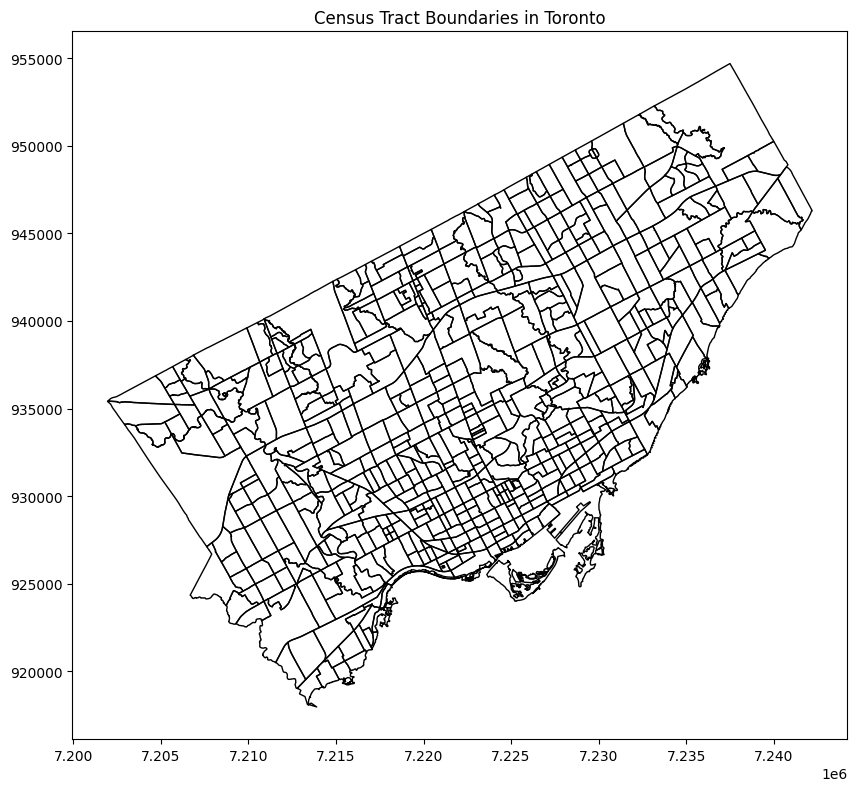

In [45]:
# Ensure geometries are valid
gdf = gdf[gdf.is_valid]

# Plot the data
central_toronto_gdf.plot(figsize=(10, 10), edgecolor='black', facecolor='none')
plt.title("Census Tract Boundaries in Toronto")
plt.show()

# fig, ax = plt.subplots(figsize=(10, 10))
# central_toronto_gdf.plot(ax=ax)
# gdf.plot(ax=ax, color='red', marker='o', markersize=5, label='Centroids')
# plt.xlim(-180, -60)
# plt.ylim(10, 80)
# plt.title('toronto')
# plt.xlabel('x-coordinate')
# plt.ylabel('y-coordinate')
# plt.show()

In [ ]:
# Save to csv
# df = pd.DataFrame(gdf)
n_centroids_gdf = gpd.GeoDataFrame(central_toronto_gdf[['CTUID']], central_toronto_gdf[['DGUID']], central_toronto_gdf[['CTNAME']],
                                 central_toronto_gdf[['LANDAREA']], central_toronto_gdf[['PRUID']], geometry=central_toronto_gdf['centroid'])

OUTPUT_PATH = "/toronto_ct_centroids.geojson"
n_centroids_gdf.to_json(OUTPUT_PATH)

TypeError: DataFrame.__init__() got multiple values for argument 'copy'

In [ ]:
central_toronto_gdf = central_toronto_gdf.to_crs('EPSG:3857')
n_centroids_gdf = gpd.GeoDataFrame(central_toronto_gdf[['CTUID']], central_toronto_gdf[['DGUID']], central_toronto_gdf[['CTNAME']],
                                 central_toronto_gdf[['LANDAREA']], central_toronto_gdf[['PRUID']], geometry=central_toronto_gdf['centroid'])

OUTPUT_PATH = "/toronto_ct_centroids.geojson"
n_centroids_gdf.to_json(OUTPUT_PATH)

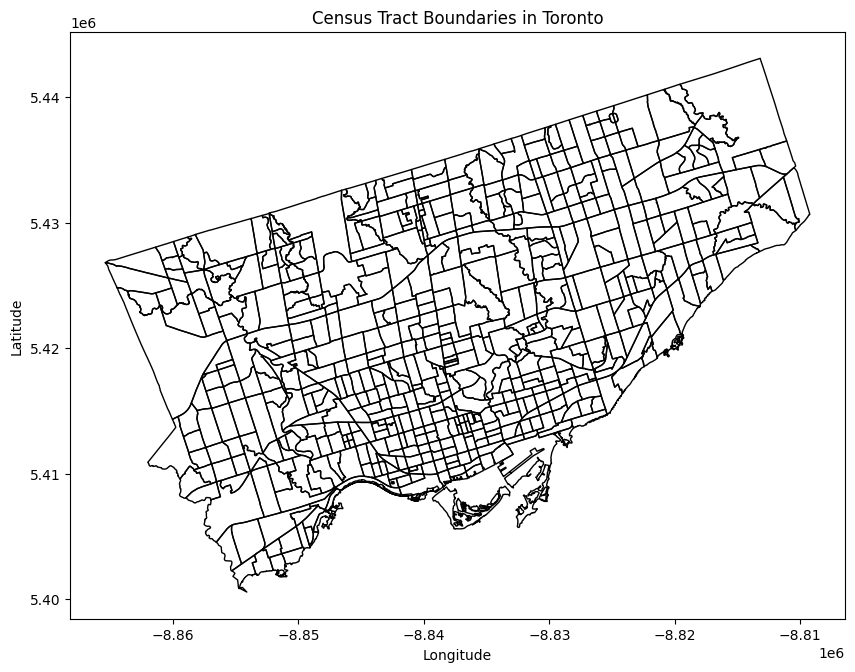

In [ ]:
import folium

central_toronto_gdf.plot(figsize=(10, 10), edgecolor='black', facecolor='none')
plt.title("Census Tract Boundaries in Toronto")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

OUTPUT_PATH = "toronto_ct_boundaries.json"
central_toronto_gdf.to_file(OUTPUT_PATH, driver='GeoJSON')


# Create a map centered around Toronto
m = folium.Map(location=[43.65107, -79.347015], zoom_start=12)

# Add the GeoDataFrame to the map
folium.GeoJson(central_toronto_gdf).add_to(m)

# Save the map to an HTML file
m.save("toronto_map.html")

# Display the map
m

In [ ]:
OUTPUT_PATH = "toronto_ct_boundaries.json"
central_toronto_gdf.to_file(OUTPUT_PATH, driver='GeoJSON')
